#Exploratory Analysis

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##Load data

more info in the topic of gas costs here:
http://ethdocs.org/en/latest/contracts-and-transactions/account-types-gas-and-transactions.html


In [2]:
df = pd.read_csv('./../data/data.csv')

In [3]:
df.shape

(1494279, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494279 entries, 0 to 1494278
Data columns (total 39 columns):
Unnamed: 0      1494279 non-null int64
_id_t           1494279 non-null object
accountNonce    1494279 non-null int64
amount          1494279 non-null float64
blockHash       1494279 non-null object
block_id        1494279 non-null int64
gasLimit_t      1494279 non-null int64
gasUsed_t       1494279 non-null int64
hash_t          1494279 non-null object
isContractTx    0 non-null float64
newContract     1494279 non-null int64
parentHash_t    1494279 non-null object
price           1494279 non-null float64
recipient       1494279 non-null object
sender          1494279 non-null object
time_t          1494279 non-null object
txIndex         515711 non-null float64
type            1494279 non-null object
_id_b           1494279 non-null object
blockTime       1494279 non-null int64
coinbase        1494279 non-null object
difficulty      1494279 non-null object
extra           1

In [5]:
print('no txs: {}, no blocks: {}'.format(df.shape[0], np.unique(df['block_id'].values).shape[0]))

no txs: 1494279, no blocks: 14583


## Convert dates to datetime

In [6]:
df.loc[:,'time_t'] = pd.to_datetime(df.time_t, yearfirst=True)

In [7]:
df.loc[:,'time_b'] = pd.to_datetime(df.time_b, yearfirst=True)

In [8]:
df['time_t'].head()

0   2017-09-20 20:24:15
1   2017-09-20 20:24:15
2   2017-09-20 20:24:15
3   2017-09-20 20:24:15
4   2017-09-20 20:24:15
Name: time_t, dtype: datetime64[ns]

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Convert long integer columns
- difficulty
- reward
- totalFee

Filter each string extracting the digits as integers

In [10]:
int(filter(str.isdigit, df['difficulty'][0]))

2338428842518947

In [11]:
df['difficulty'] = df['difficulty'].apply(lambda x: int(filter(str.isdigit, x)))

In [12]:
df['difficulty'].head()

0    2338428842518947
1    2338428842518947
2    2338428842518947
3    2338428842518947
4    2338428842518947
Name: difficulty, dtype: int64

In [13]:
df['reward'] = df['reward'].apply(lambda x: int(filter(str.isdigit, x)))

In [14]:
df['reward'].head()

0    5008232105000000000
1    5008232105000000000
2    5008232105000000000
3    5008232105000000000
4    5008232105000000000
Name: reward, dtype: int64

In [15]:
df['totalFee'] = df['totalFee'].apply(lambda x: int(filter(str.isdigit, x)))

In [16]:
df['totalFee'].head()

0    8232105000000000
1    8232105000000000
2    8232105000000000
3    8232105000000000
4    8232105000000000
Name: totalFee, dtype: int64

## Convert floats back to ints
- when collecting data from the api, some of the ints were longer than 8 bytes causing mongo to throw up errors 
- to avoid this we temporarily converted those to floats 

In [17]:
def float_to_int(col_list):
    for col in col_list:
        df[col] = df[col].apply(lambda x: np.rint(x))
        df[col] = df[col].values.astype(int)

In [18]:
float_to_int(['amount', 'price', 'gasLimit_b', 'gasUsed_b'])

In [19]:
df['isContractTx'].isnull().sum()

1494279

The column "isContractTx" is empty so drop it

In [20]:
df.drop('isContractTx', axis=1, inplace=True)

Binarize the amount column (1 if > 0 and 0 if 0)

In [21]:
df['amount_binary'] = df['amount'].map(lambda x: 1 if x > 0 else 0)

##Decription:
###Transaction level
- hash_t : a unique identifier for each transaction
- accountNonce : the number of transactions the sender account has made on the network (mechanism to ensure the same tranaction isn't submitted twice)
- amount : for monetary transactions, the amount in Ether that is exchanged
- block_id : a unique identifier for each block
- gasLimit_t : the maximum amount of gas that is allowed to be spent on gas for a given transaction
- gasUsed_t : the actual amount of gas that was consumed on the given transaction 
- newContract : whether it is a new contract or not
- price : the price per unit gas (Wei)
- txIndex : an integer from 1 to 20 (or NaN)
- amount_binary : binarized amount column (1 if amount is non-zero)
- type : the kind of transaction
    - tx
    - call
    - create
    - suicide

###Block level
- blockTime : the total amount of time spent on the block
- difficulty : 
- gasLimit_b :
- gasUsed_b :
- reward :
- size : 
- time_b :
- totalFee :
- tx_count : the total number of txs in a given block
- uncle_count : 

##Categorical variables:
- txIndex
- type
- amount_binary

#Explore features

###New column with converted price from Wei to Gwei

In [22]:
for c in df.columns:
    print(c)

_id_t
accountNonce
amount
blockHash
block_id
gasLimit_t
gasUsed_t
hash_t
newContract
parentHash_t
price
recipient
sender
time_t
txIndex
type
_id_b
blockTime
coinbase
difficulty
extra
gasLimit_b
gasUsed_b
hash_b
mixDigest
nonce
number
parentHash_b
reward
root
size
time_b
totalFee
txHash
tx_count
uncleHash
uncle_count
amount_binary


In [23]:
df['price_gwei'] = df['price'] / 1000000000.0
df['amount_gwei'] = df['amount'] / 1000000000.0

In [24]:
df[['price_gwei', 'gasUsed_t','gasUsed_b','difficulty' ]].describe()

,price_gwei,gasUsed_t,gasUsed_b,difficulty
count,1.494279e+06,1.494279e+06,1.494279e+06,1.494279e+06
mean,2.910570e+01,4.106297e+04,5.908751e+06,2.603867e+15
std,1.341286e+02,1.470751e+05,1.572028e+06,1.705335e+15
min,1.000000e-09,0.000000e+00,2.100000e+04,2.243458e+15
25%,2.000000e+01,8.695000e+03,6.220577e+06,2.353884e+15
50%,2.100000e+01,2.100000e+04,6.668458e+06,2.385757e+15
75%,4.200000e+01,3.687800e+04,6.698757e+06,2.436548e+15
max,3.730453e+04,6.717000e+06,6.779109e+06,3.098265e+16


In [25]:
df['gasShare']  = df.gasUsed_t/df.gasUsed_b
df['gweiPaid'] = df.gasUsed_t*df.price_gwei

In [26]:
gweiDict = df[['gweiPaid','block_id']].groupby('block_id').sum().T.to_dict()

In [27]:
df['gweiPaid_b'] = df.block_id.apply(lambda b: gweiDict[b]['gweiPaid'])

In [28]:
df['gweiShare']  = df.gweiPaid/df.gweiPaid_b

In [29]:
df['free_t'] = (df.gasUsed_t ==0).apply(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c48bb50>]], dtype=object)

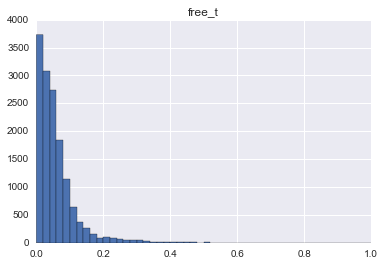

In [30]:
df[['block_id', 'free_t']].groupby('block_id').mean().hist(bins=50)

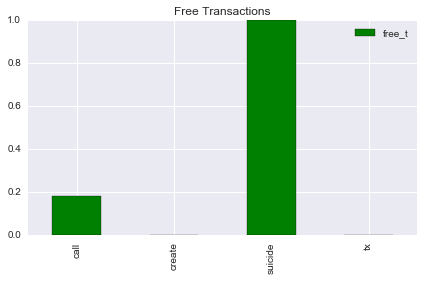

In [31]:
df[['type', 'free_t']].groupby('type').mean().plot(kind='bar', color='g')
plt.xlabel('')
plt.title('Free Transactions')
plt.tight_layout()
plt.savefig('./../images/free_transactions.png', dpi=300)

Suicide it seems is always free. Create and tx always have a cost. About 20% of call events are free but non of the create events are. more details below.

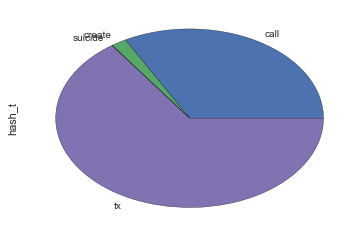

In [32]:
#shares by type of events
df[['hash_t', 'type']].groupby('type').count().hash_t.plot(kind='pie')

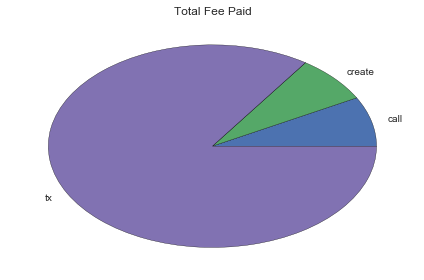

In [33]:
#fees paid by type
df[['hash_t', 'type','gweiPaid']].groupby('type').sum().gweiPaid.plot(kind='pie')
plt.title('Total Fee Paid')
plt.ylabel('')
plt.tight_layout()
plt.savefig('./../images/pie_gweipaid.png', dpi=300)

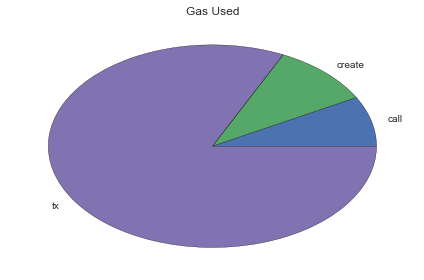

In [34]:
#gas used by type
df[['hash_t', 'type','gasUsed_t']].groupby('type').sum().gasUsed_t.plot(kind='pie')
plt.title('Gas Used')
plt.ylabel('')
plt.tight_layout()
plt.savefig('./../images/pie_gasused.png', dpi=300)

In [35]:
#quick look at transactions
txdf = df[(df['type']=='tx')&(df.amount_gwei>0)].copy()
txdf['logGweiAmount'] = txdf.amount_gwei.apply(np.log10)
txdf['logGweiPrice'] = txdf.price_gwei.apply(np.log10)
txdf['logGasUsed'] = txdf.gasUsed_t.apply(np.log10)

In [36]:
txdf[['amount_gwei','price_gwei','gasUsed_t']].describe()

,amount_gwei,price_gwei,gasUsed_t
count,5.355870e+05,5.355870e+05,5.355870e+05
mean,1.014558e+09,2.830393e+01,2.945847e+04
std,1.769756e+09,9.185157e+01,8.174162e+04
min,1.000000e-09,1.000000e-09,2.100000e+04
25%,7.550040e+07,2.100000e+01,2.100000e+04
50%,2.009860e+08,2.100000e+01,2.100000e+04
75%,1.000026e+09,3.000000e+01,2.100000e+04
max,9.223372e+09,2.100000e+04,6.717000e+06


In [37]:
txdf[['logGweiAmount','logGweiPrice','logGasUsed']].describe()

,logGweiAmount,logGweiPrice,logGasUsed
count,535587.000000,535587.000000,535587.000000
mean,8.304347,1.331857,4.375389
std,1.058266,0.341281,0.184848
min,-9.000000,-9.000000,4.322219
25%,7.877949,1.322219,4.322219
50%,8.303166,1.322219,4.322219
75%,9.000011,1.477121,4.322219
max,9.964890,4.322219,6.827175


In [38]:
#sns.pairplot(txdf[['logGweiAmount','logGweiPrice','logGasUsed']])

tx type is the only ones for which amount is non-zero. Moving forward we aren't looking at the ammount focusing on the gas amount used and the price paid for that gas.

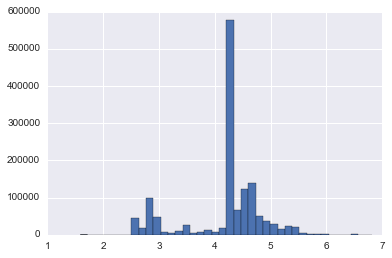

In [39]:
df[df.gasUsed_t>0].gasUsed_t.apply(np.log10).hist(bins=40)

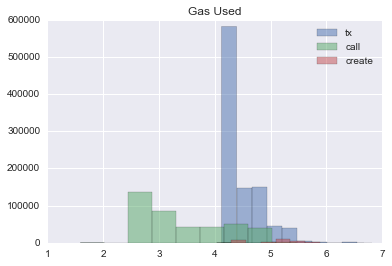

In [40]:
df[(df.gasUsed_t>0)&(df['type']=='tx')].gasUsed_t.apply(np.log10).hist(bins=10,alpha=.5)
df[(df.gasUsed_t>0)&(df['type']=='call')].gasUsed_t.apply(np.log10).hist(bins=10,alpha=.5)
df[(df.gasUsed_t>0)&(df['type']=='create')].gasUsed_t.apply(np.log10).hist(bins=10,alpha=.5)

plt.title('Gas Used')
plt.legend(['tx','call','create'])

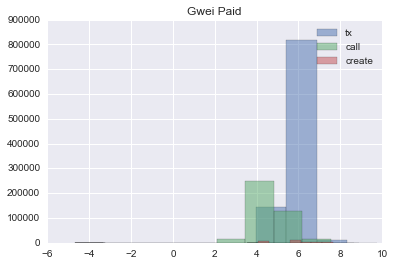

In [41]:
df[(df.gasUsed_t>0)&(df['type']=='tx')].gweiPaid.apply(np.log10).hist(bins=10,alpha=.5)
df[(df.gasUsed_t>0)&(df['type']=='call')].gweiPaid.apply(np.log10).hist(bins=10,alpha=.5)
df[(df.gasUsed_t>0)&(df['type']=='create')].gweiPaid.apply(np.log10).hist(bins=10,alpha=.5)

plt.title('Gwei Paid')
plt.legend(['tx','call','create'])

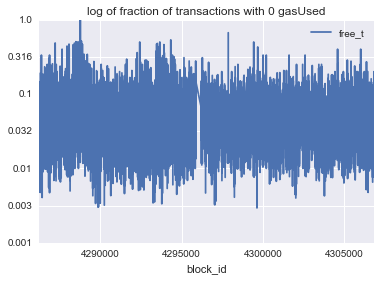

In [42]:
#compute the fraction of transactions with zero gasUsed by block
df[['block_id', 'free_t']].groupby('block_id').mean().apply(np.log10).plot()
plt.title('log of fraction of transactions with 0 gasUsed')
ax = plt.gca()
ax.set_yticklabels([round(10**y,3) for y in ax.get_yticks()])

In [43]:
signals = df[['block_id', 'free_t','type']].groupby(['type','block_id']).mean().reset_index()
signals.head()

,type,block_id,free_t
0,call,4286251,0.076923
1,call,4286252,0.162162
2,call,4286253,1.000000
3,call,4286254,0.200000
4,call,4286255,0.161765


In [44]:
signals.groupby('type').describe()

block_id                                                               \
           count          mean          std        min         25%        50%   
type                                                                            
call     13721.0  4.294948e+06  5898.611733  4286251.0  4290063.00  4293795.0   
create    7499.0  4.294838e+06  5935.215775  4286252.0  4289917.50  4293298.0   
suicide     98.0  4.294475e+06  5057.342132  4286963.0  4290187.50  4293205.0   
tx       14570.0  4.294948e+06  5912.447429  4286251.0  4290053.25  4293773.5   

                                 free_t                                     \
                75%        max    count      mean       std  min       25%   
type                                                                         
call     4299650.00  4306841.0  13721.0  0.214579  0.201976  0.0  0.083333   
create   4299633.50  4306839.0   7499.0  0.000741  0.021762  0.0  0.000000   
suicide  4296963.00  4306466.0     98.0  1.000000  0.000000  1.0  1.000000   
tx       4299658.75  4306841.0  14570.0  0.000000  0.000000  0.0  0.000000   

                              
          50%       75%  max  
type                          
call     0.16  0.282609  1.0  
create   0.00  0.000000  1.0  
suicide  1.00  1.000000  1.0  
tx       0.00  0.000000  0.0

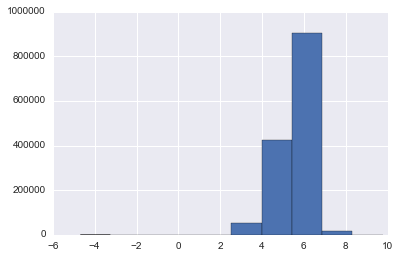

In [45]:
df[df.gweiPaid>0].gweiPaid.apply(np.log10).hist()

In [46]:
df.gasShare.describe()

count    1.494279e+06
mean     8.004330e-03
std      2.609830e-02
min      0.000000e+00
25%      1.452795e-03
50%      3.167304e-03
75%      7.455767e-03
max      1.000000e+00
Name: gasShare, dtype: float64

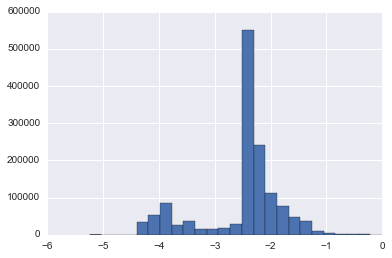

In [47]:
df[df.gasShare>0].gasShare.apply(np.log10).hist(bins=25)

In [48]:
#reduced dataframe
rdf = df[['gasUsed_t','gasShare','gweiPaid','gweiShare', 'price_gwei', 'type']].copy()

In [49]:
rdf.head()

,gasUsed_t,gasShare,gweiPaid,gweiShare,price_gwei,type
0,21000,0.054830,441000.0,0.051115,21.0,tx
1,9416,0.024585,197736.0,0.022919,21.0,call
2,21000,0.054830,441000.0,0.051115,21.0,tx
3,21000,0.054830,441000.0,0.051115,21.0,tx
4,21000,0.054830,441000.0,0.051115,21.0,tx


In [50]:
#sns.pairplot(rdf[df.gweiPaid>0], hue="type")

In [51]:
#log10 values of reduced dataframe
ldf = rdf[df.gweiPaid>0].copy()
for c in ['gasUsed_t','gasShare','gweiPaid','gweiShare', 'price_gwei']:
    ldf[c] = ldf[c].apply(np.log10)

In [52]:
ldf.describe()

,gasUsed_t,gasShare,gweiPaid,gweiShare,price_gwei
count,1.404478e+06,1.404478e+06,1.404478e+06,1.404478e+06,1.404478e+06
mean,4.210493e+00,-2.528868e+00,5.482841e+00,-2.481160e+00,1.272349e+00
std,6.983038e-01,7.148782e-01,7.297942e-01,7.447058e-01,4.454878e-01
min,1.591065e+00,-5.238463e+00,-4.686998e+00,-1.270125e+01,-9.000000e+00
25%,4.322219e+00,-2.505209e+00,5.054445e+00,-2.813734e+00,1.301030e+00
50%,4.322219e+00,-2.491321e+00,5.644439e+00,-2.356061e+00,1.322219e+00
75%,4.572128e+00,-2.112984e+00,5.960484e+00,-2.012265e+00,1.602060e+00
max,6.827175e+00,0.000000e+00,9.755624e+00,0.000000e+00,4.571762e+00


In [53]:
#sns.pairplot(ldf, hue="type")

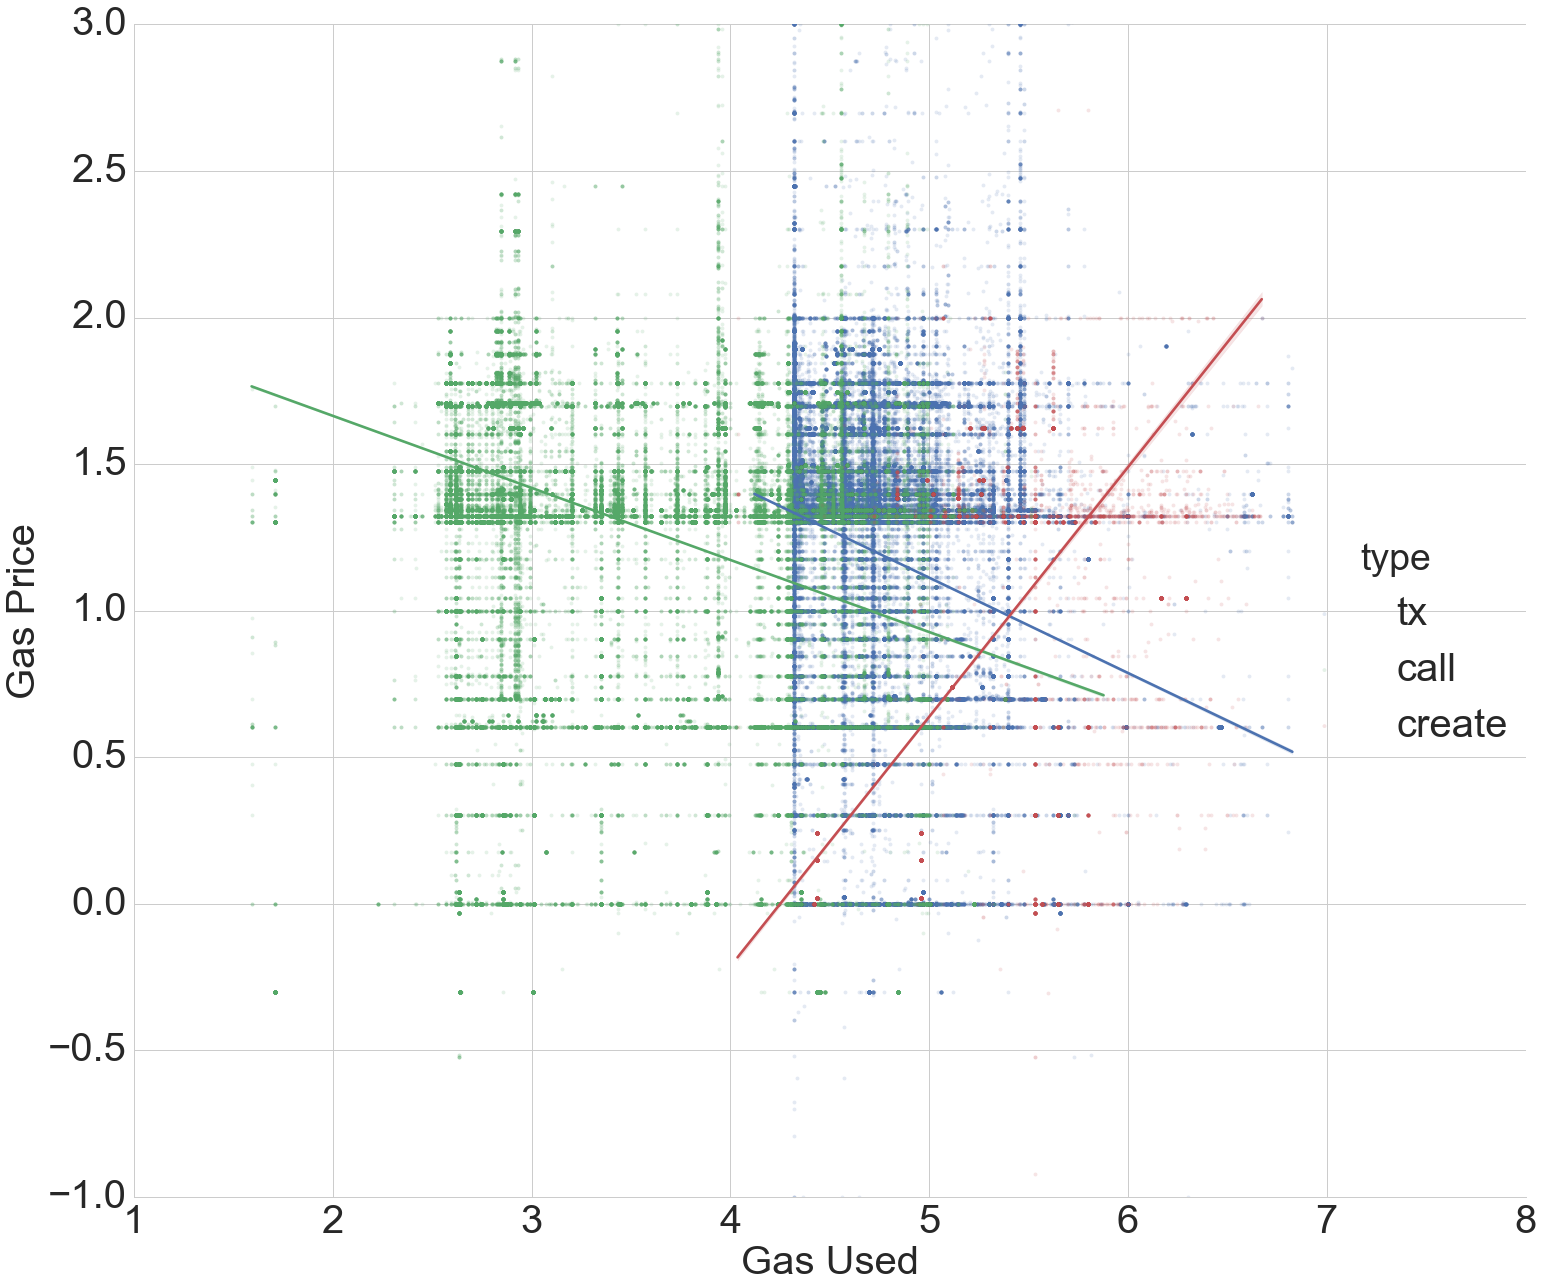

In [97]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook", font_scale=4.0)
sns.lmplot(x="gasUsed_t", y="price_gwei", hue="type",truncate=True, size=18, data=ldf, 
           scatter_kws={"s": 15,"alpha": .15})
plt.ylim(-1, 3)
plt.ylabel('Gas Price', fontsize=40)
plt.xlabel('Gas Used', fontsize=40)
plt.tight_layout()
plt.savefig('./../images/regmodel.png', dpi=300)

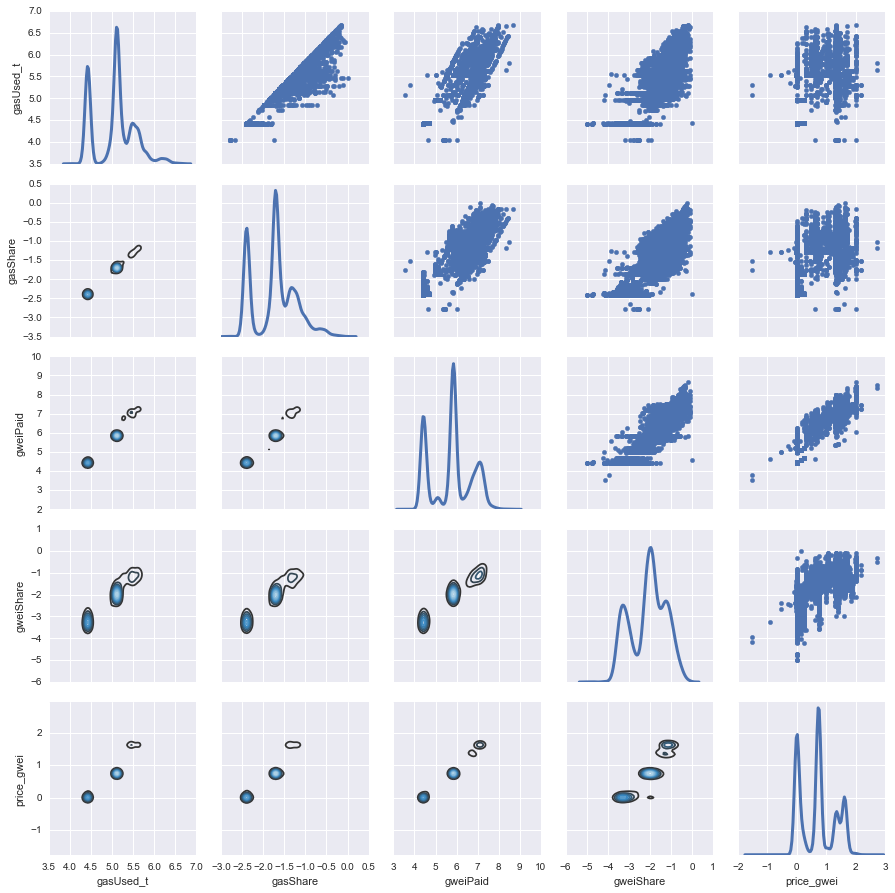

In [57]:
g = sns.PairGrid(ldf[ldf['type']=='create'], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig('./../images/pair_kde.png')

## Toy model figure

In [68]:
from scipy.stats import norm

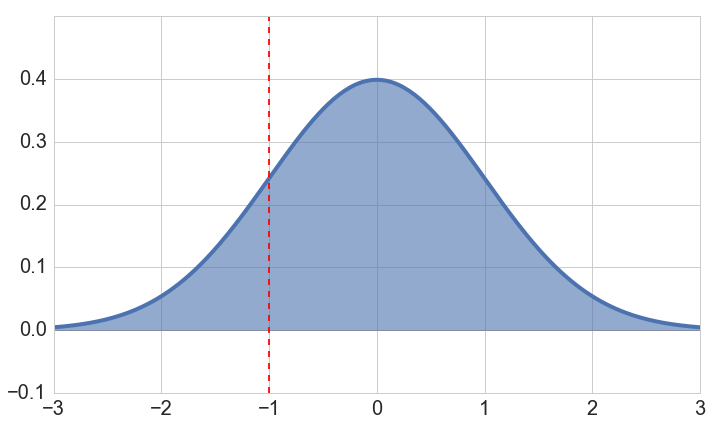

In [96]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("notebook", font_scale=2.0)
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(x, norm.pdf(x), linewidth=4)
ax.set_xlim(-3, 3)
ax.set_ylim(-0.1, 0.5)
ax.fill_between(x, norm.pdf(x), alpha=0.6)
ax.axvline(x=-1, color='r', linestyle='--')
ax.set_title("")
plt.tight_layout()
plt.savefig('./../images/hyp_dist.png', dpi=300)